### 독버섯 분류
- 데이터셋 : mushroom.csv
- 알고리즘 : 지도학습 > 분류 => LogisticRegression, DecisionTreeClassifier, VotingClassifier

In [1]:
# 모듈 로딩
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 판다스에 지수표기점(과학적 표기법) 정지 설정
pd.options.display.float_format = '{:.5f}'.format

# 과학적/지수 표기법 대신 소수점 6자리까지 나타낸다
np.set_printoptions(precision=6, suppress=True)

In [2]:
file = '../data/mushrooms.csv'

In [3]:
mushDF = pd.read_csv(file)
mushDF.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
# DF 정보
mushDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
# 각 열의 고유값 확인
for col in mushDF.columns:
    print(col,'열 고유값 :',mushDF[col].unique())

class 열 고유값 : ['p' 'e']
cap-shape 열 고유값 : ['x' 'b' 's' 'f' 'k' 'c']
cap-surface 열 고유값 : ['s' 'y' 'f' 'g']
cap-color 열 고유값 : ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises 열 고유값 : ['t' 'f']
odor 열 고유값 : ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment 열 고유값 : ['f' 'a']
gill-spacing 열 고유값 : ['c' 'w']
gill-size 열 고유값 : ['n' 'b']
gill-color 열 고유값 : ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape 열 고유값 : ['e' 't']
stalk-root 열 고유값 : ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring 열 고유값 : ['s' 'f' 'k' 'y']
stalk-surface-below-ring 열 고유값 : ['s' 'f' 'y' 'k']
stalk-color-above-ring 열 고유값 : ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring 열 고유값 : ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type 열 고유값 : ['p']
veil-color 열 고유값 : ['w' 'n' 'o' 'y']
ring-number 열 고유값 : ['o' 't' 'n']
ring-type 열 고유값 : ['p' 'e' 'l' 'f' 'n']
spore-print-color 열 고유값 : ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population 열 고유값 : ['s' 'n' 'a' 'v' 'y' 'c']
habitat 열 고유값 : ['u' 'g' 'm' 'd' 'p' 'w'

In [6]:
mushDF_ohe = pd.get_dummies(mushDF)
mushDF_ohe

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
1,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8120,True,False,False,False,False,False,False,True,False,False,...,False,True,False,False,False,True,False,False,False,False
8121,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8122,False,True,False,False,False,True,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False


In [7]:
# columns 생략 없이 출력
pd.set_option('display.max_columns', None)

In [8]:
mushDF_ohe.corr()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
class_e,1.00000,-1.00000,0.18257,-0.02301,-0.01853,-0.16357,0.06066,0.02689,0.19541,-0.02301,-0.09545,-0.08868,-0.06754,0.03091,-0.09711,0.04646,0.04436,-0.03470,0.04285,0.04285,0.13368,-0.11301,-0.50153,0.50153,0.21953,-0.16128,-0.62384,0.21953,-0.06916,0.78556,-0.18698,-0.28636,-0.28636,0.12920,-0.12920,-0.34839,0.34839,0.54002,-0.54002,-0.53881,0.10549,-0.12028,-0.15069,0.14964,0.28894,0.08596,0.05038,-0.05643,0.19536,0.23132,0.04683,-0.10202,0.10202,-0.30200,-0.01771,0.21855,0.20284,0.15009,0.11950,-0.58766,0.49131,0.01620,0.13678,-0.57352,0.42544,0.08167,-0.24566,-0.06916,0.10549,0.26649,-0.23316,0.15009,-0.23028,0.21774,-0.03255,-0.24566,-0.06916,0.10549,0.26649,-0.20397,0.15009,-0.23028,0.21411,-0.05643,NaN,0.10549,0.10549,-0.14054,-0.03255,-0.06916,-0.18210,0.20460,-0.22329,0.07437,-0.45162,-0.06916,0.54047,0.07437,-0.49023,0.39683,0.41665,0.07437,-0.09802,0.07437,-0.35738,0.07437,0.21487,0.13764,0.21953,0.15957,-0.44372,0.10705,0.12612,0.16500,-0.15515,0.13863,-0.32335,-0.11208,0.15009
class_p,-1.00000,1.00000,-0.18257,0.02301,0.01853,0.16357,-0.06066,-0.02689,-0.19541,0.02301,0.09545,0.08868,0.06754,-0.03091,0.09711,-0.04646,-0.04436,0.03470,-0.04285,-0.04285,-0.13368,0.11301,0.50153,-0.50153,-0.21953,0.16128,0.62384,-0.21953,0.06916,-0.78556,0.18698,0.28636,0.28636,-0.12920,0.12920,0.34839,-0.34839,-0.54002,0.54002,0.53881,-0.10549,0.12028,0.15069,-0.14964,-0.28894,-0.08596,-0.05038,0.05643,-0.19536,-0.23132,-0.04683,0.10202,-0.10202,0.30200,0.01771,-0.21855,-0.20284,-0.15009,-0.11950,0.58766,-0.49131,-0.01620,-0.13678,0.57352,-0.42544,-0.08167,0.24566,0.06916,-0.10549,-0.26649,0.23316,-0.15009,0.23028,-0.21774,0.03255,0.24566,0.06916,-0.10549,-0.26649,0.20397,-0.15009,0.23028,-0.21411,0.05643,NaN,-0.10549,-0.10549,0.14054,0.03255,0.06916,0.18210,-0.20460,0.22329,-0.07437,0.45162,0.06916,-0.54047,-0.07437,0.49023,-0.39683,-0.41665,-0.07437,0.09802,-0.07437,0.35738,-0.07437,-0.21487,-0.13764,-0.21953,-0.15957,0.44372,-0.10705,-0.12612,-0.16500,0.15515,-0.13863,0.32335,0.11208,-0.15009
cap-shape_b,0.18257,-0.18257,1.00000,-0.00539,-0.19326,-0.08177,-0.01526,-0.21956,-0.09164,0.01882,0.11771,-0.02795,0.01001

In [9]:
featureDF = mushDF_ohe.drop(['class_e','class_p'], axis=1)
targetSR = mushDF_ohe['class_e']

In [10]:
#  학습용/테스트용 데이터 분리
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(featureDF, targetSR, random_state=10, stratify=targetSR)

In [11]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [12]:
print(f'X_train : {X_train.shape}, {X_train.ndim}D  X_test : {X_test.shape}, {X_test.ndim}D')

print(f'y_train : {y_train.shape}, {y_train.ndim}D      y_test : {y_test.shape}, {y_test.ndim}D')

X_train : (6093, 117), 2D  X_test : (2031, 117), 2D
y_train : (6093,), 1D      y_test : (2031,), 1D


#### Decision Tree

In [13]:
# 학습 진행
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=10)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [14]:
# 성능 평가
# 학습용 데이터셋
train_score = dt_model.score(X_train, y_train)

# 테스트용 데이터셋
test_score = dt_model.score(X_test, y_test)

In [15]:
print(f'train_score:test_score = {train_score}: {test_score}')

train_score:test_score = 1.0: 1.0


In [16]:
# 교차 검증
from sklearn.model_selection import cross_validate
# 교차검증 준비 ==> 모델 인스턴스, trainDS
dt_model2 = DecisionTreeClassifier(random_state=1)
result = cross_validate(dt_model2, X_train, y_train, return_train_score=True, return_estimator=True)

In [17]:
result

{'fit_time': array([0.014733, 0.012993, 0.015037, 0.016082, 0.014096]),
 'score_time': array([0.003011, 0.001995, 0.002036, 0.00198 , 0.002078]),
 'estimator': [DecisionTreeClassifier(random_state=1),
  DecisionTreeClassifier(random_state=1),
  DecisionTreeClassifier(random_state=1),
  DecisionTreeClassifier(random_state=1),
  DecisionTreeClassifier(random_state=1)],
 'test_score': array([1., 1., 1., 1., 1.]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [18]:
# dict => DataFrame
resultDF = pd.DataFrame(result)
resultDF

,fit_time,score_time,estimator,test_score,train_score
0,0.01473,0.00301,DecisionTreeClassifier(random_state=1),1.00000,1.00000
1,0.01299,0.00199,DecisionTreeClassifier(random_state=1),1.00000,1.00000
2,0.01504,0.00204,DecisionTreeClassifier(random_state=1),1.00000,1.00000
3,0.01608,0.00198,DecisionTreeClassifier(random_state=1),1.00000,1.00000
4,0.01410,0.00208,DecisionTreeClassifier(random_state=1),1.00000,1.00000


In [19]:
# 튜닝
from sklearn.model_selection import GridSearchCV

In [20]:
params={'max_depth':[10,7,6,5], 'min_samples_leaf':[50,60,100]}

In [21]:
gscv = GridSearchCV(DecisionTreeClassifier(), param_grid=params, refit=True, return_train_score=True)
gscv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [10, 7, 6, 5],
                         'min_samples_leaf': [50, 60, 100]},
             return_train_score=True)

In [22]:
# 모델 파라미터 확인
print(f'[gscv.best_params_] {gscv.best_params_}')
print(f'[gscv.best_score_] {gscv.best_score_}')
print(f'[gscv.best_estimator_] {gscv.best_estimator_}')

cv_resultDF = pd.DataFrame(gscv.cv_results_)

[gscv.best_params_] {'max_depth': 10, 'min_samples_leaf': 50}
[gscv.best_score_] 0.9809614060894081
[gscv.best_estimator_] DecisionTreeClassifier(max_depth=10, min_samples_leaf=50)


In [23]:
cv_resultDF.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [24]:
result_scoreDF = cv_resultDF[['mean_train_score', 'mean_test_score']].copy()
result_scoreDF['diff'] = cv_resultDF['mean_train_score']-cv_resultDF['mean_test_score']
result_scoreDF

,mean_train_score,mean_test_score,diff
0,0.98096,0.98096,0.00000
1,0.97222,0.96980,0.00242
2,0.96972,0.96849,0.00123
3,0.98096,0.98096,0.00000
4,0.97222,0.96980,0.00242
5,0.96972,0.96849,0.00123
6,0.98096,0.98096,0.00000
7,0.97222,0.96980,0.00242
8,0.96972,0.96849,0.00123
9,0.98096,0.98096,0.00000


In [25]:
# 주요 피처 시각화

## 가장 좋은 모델
best_model = gscv.best_estimator_
print(f'[best_model.max_depth] {best_model.max_depth}')
print(f'[best_model.min_samples_leaf] {best_model.min_samples_leaf}')

[best_model.max_depth] 10
[best_model.min_samples_leaf] 50


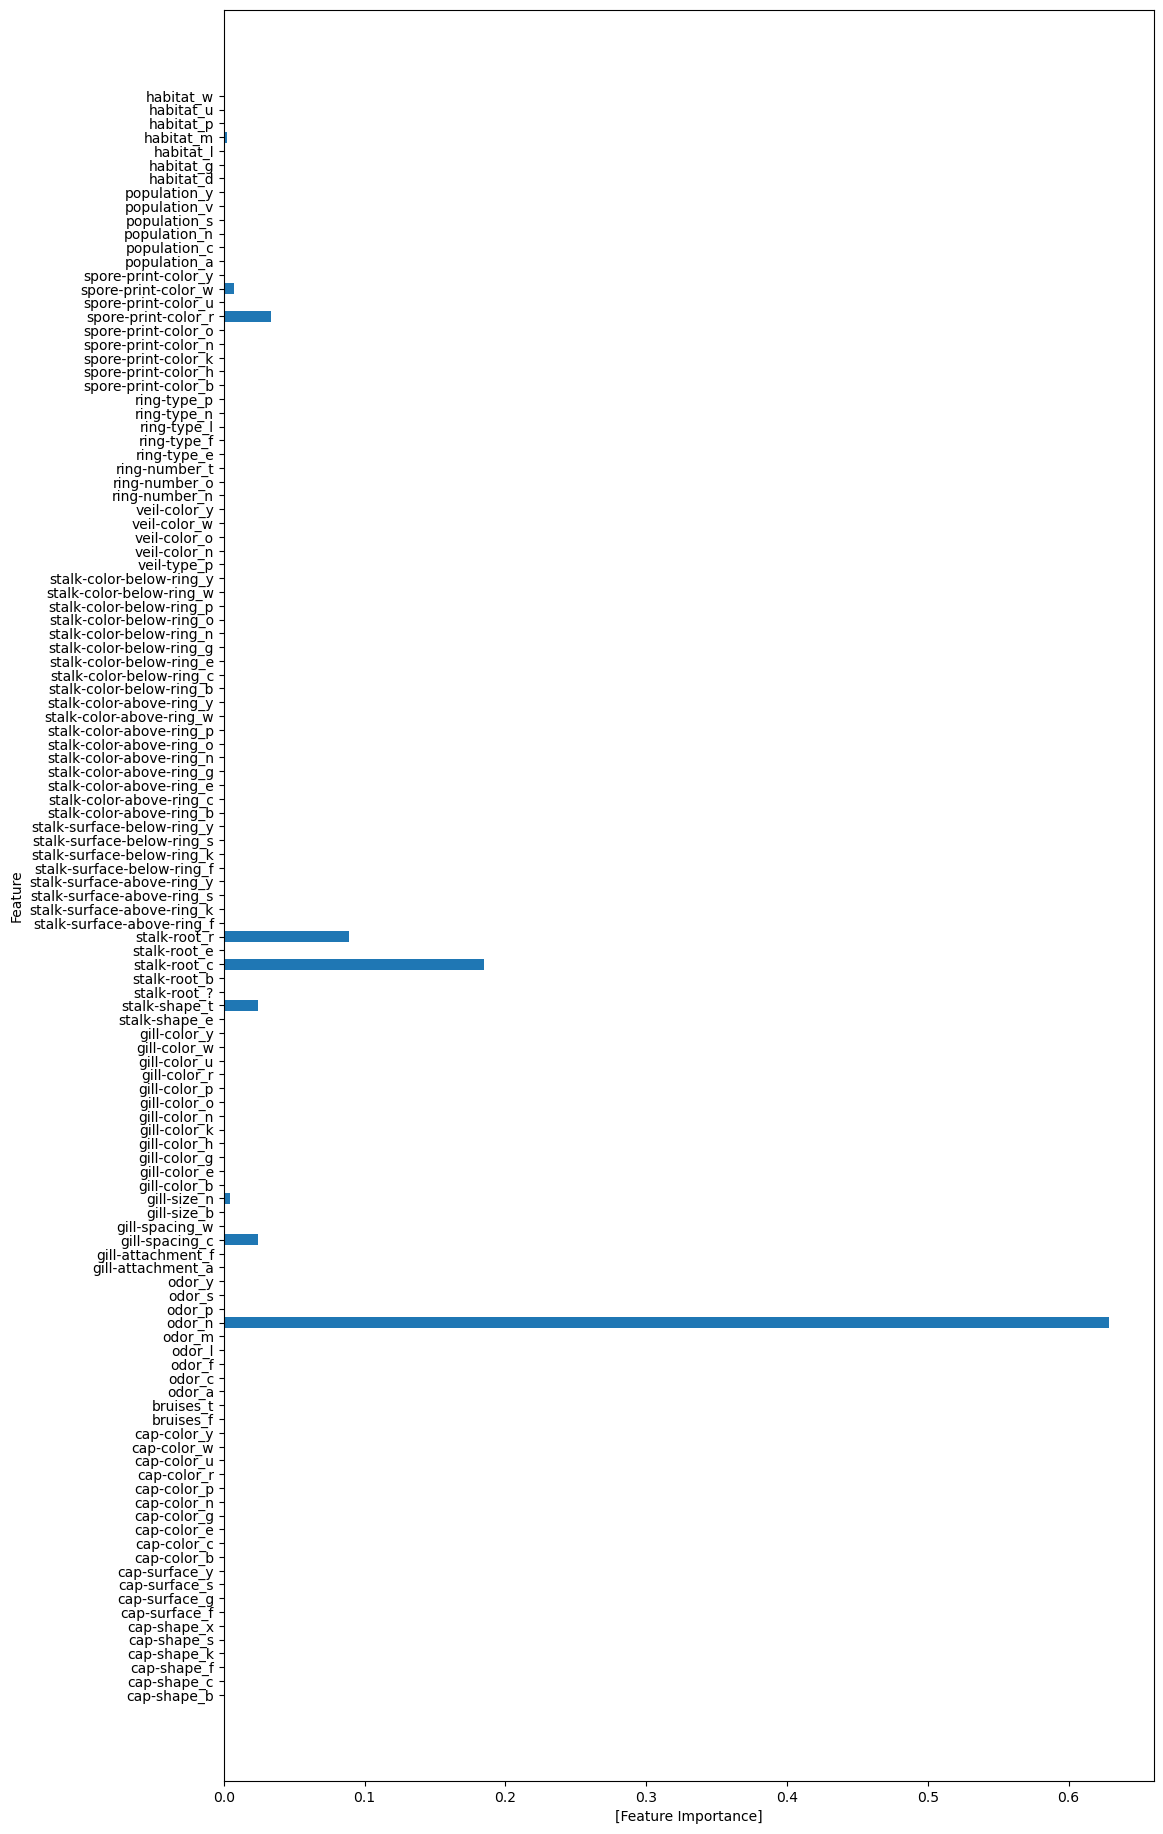

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,23))
plt.barh(range(best_model.n_features_in_), best_model.feature_importances_, align='center')
plt.yticks(np.arange(best_model.n_features_in_), best_model.feature_names_in_)
plt.xlabel('[Feature Importance]')
plt.ylabel('Feature')
plt.show()

In [27]:
# Decision Tree 시각화
## DT모델을 dot포맷의 파일로 저장 ==> export_graphxiz()
from sklearn.tree import export_graphviz

export_graphviz(best_model, out_file='tree.dot', class_names=['Poison','Edible'], 
                feature_names=best_model.feature_names_in_, impurity=True, filled=True, rounded=True)

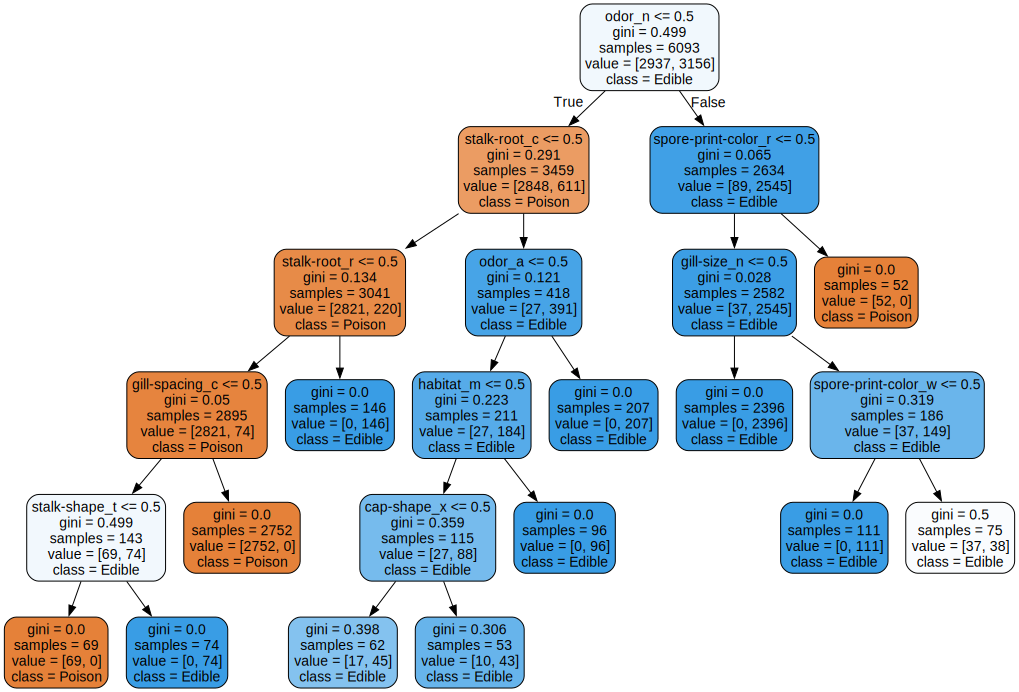

In [28]:
## dot 파일 출력
import graphviz

# 파일에서 데이터 읽어오기
with open('tree.dot')as f:
    dot_data = f.read()

# 화면에 출력하기
graphviz.Source(dot_data)

#### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [30]:
# 로지스틱 회귀로 학습 및 예측 수행, ROC-AUC값 구하기 (ROC-AUC : 다양한 임계값에서 모델의 분류 성능에 대한 측정 그래프)
from sklearn.metrics import accuracy_score, roc_auc_score

In [31]:
# 서로 다른 solver 값으로 로지스틱회귀를 학습하고 성능평가
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']

# 여러개의 solver 값별로 로지스틱 회귀 학습 후 ㅅ어능 평가
for solver in solvers:
    lr_model = LogisticRegression(solver=solver, max_iter=600)
    lr_model.fit(X_train, y_train)
    lr_preds = lr_model.predict(X_test)
    lr_preds_proba = lr_model.predict_proba(X_test)[:,1]

    # accuracy와 roc_auc 측정
    print(f'solver : {solver}      accuracy : {accuracy_score(y_test, lr_preds):.3f}, roc_auc : {roc_auc_score(y_test, lr_preds_proba):.3f}')

solver : lbfgs      accuracy : 1.000, roc_auc : 1.000
solver : liblinear      accuracy : 1.000, roc_auc : 1.000
solver : newton-cg      accuracy : 1.000, roc_auc : 1.000
solver : sag      accuracy : 1.000, roc_auc : 1.000
solver : saga      accuracy : 1.000, roc_auc : 1.000


In [32]:
## 모델 파라미터
print(f'classes_ : {lr_model.classes_}, {len(lr_model.classes_)}개')
print(f'n_features_in_ : {lr_model.n_features_in_}')
print(f'n_iter_ : {lr_model.n_iter_}')
print(f'coef_ : {lr_model.coef_}, {len(lr_model.coef_[0])}개')
print(f'intercept_ : {lr_model.intercept_}')

classes_ : [False  True], 2개
n_features_in_ : 117
n_iter_ : [62]
coef_ : [[-0.414416 -0.48525   0.077928  0.060757  0.534844  0.181802  0.847301
  -0.67645  -0.22604   0.010853 -0.970705  0.944546 -0.036201 -0.084333
   0.383295 -0.730857  0.393114  0.364818 -0.489474  0.181461  0.083837
  -0.128173  2.799167 -2.659692 -2.640095  2.731622 -0.325759  3.963569
  -2.174849 -0.877428 -0.86087   0.148549 -0.192885 -1.514639  1.470303
   2.112952 -2.157288 -1.878156  0.500388  0.045091 -0.112323  0.447179
   0.646683  0.098584  0.454588 -0.629791  0.220459  0.380178 -0.217216
  -0.692154  0.647818  0.541518 -2.367236  1.005109 -0.127723  0.903996
   0.684956 -1.711766  1.065378 -0.082904  1.048832 -0.390538  0.495047
  -1.197678 -0.203831 -0.325759  0.473605  0.354105  0.168546  0.304963
  -0.297595  0.043585 -0.561954 -0.148916 -0.325759  0.376924  0.306224
   1.021575  0.304963 -0.399637 -0.31966  -0.860048 -0.044336  0.151102
   0.15386   0.212656 -0.561954 -0.325759  0.024781  0.256643 -

In [33]:
### 모델의 성능 => train과 test에 대한 점수, 즉 분류의 정확도
### model.score(feature, target) : 내부에서 predic() 호출 -> 결과 예측값과 target 비교
train_score = lr_model.score(X_train, y_train)
test_score = lr_model.score(X_test, y_test)

print(f'train_score : {train_score}, test_score : {test_score}')

train_score : 1.0, test_score : 1.0


In [34]:
print(lr_model.classes_,lr_model.predict_proba(X_train),sep='\n')

[False  True]
[[0.995991 0.004009]
 [0.000012 0.999988]
 [0.999352 0.000648]
 ...
 [0.996928 0.003072]
 [0.000768 0.999232]
 [0.007614 0.992386]]


In [35]:
decisions = lr_model.decision_function(X_train)
print(decisions)

[-5.515164 11.308473 -7.341414 ... -5.782257  7.171506  4.87015 ]


In [36]:
# 선형식의 결과값 ==> 확률로 변환, 클래스가 1인 것에 대한 확률 계산
from scipy.special import expit
print(expit(decisions))
print(lr_model.predict_proba(X_train))

[0.004009 0.999988 0.000648 ... 0.003072 0.999232 0.992386]
[[0.995991 0.004009]
 [0.000012 0.999988]
 [0.999352 0.000648]
 ...
 [0.996928 0.003072]
 [0.000768 0.999232]
 [0.007614 0.992386]]


In [37]:
decisions2 = lr_model.decision_function(X_test)
print(decisions2)

[ 5.545168  6.534531 -7.744619 ... 10.617628  7.141503 -4.66784 ]


In [38]:
# 선형식의 결과값 ==> 확률로 변환, 클래스가 1인 것에 대한 확률 계산 - 테스트 데이터 확인
from scipy.special import expit
print(expit(decisions2))
print(lr_model.predict_proba(X_test))

[0.996109 0.99855  0.000433 ... 0.999976 0.999209 0.009305]
[[0.003891 0.996109]
 [0.00145  0.99855 ]
 [0.999567 0.000433]
 ...
 [0.000024 0.999976]
 [0.000791 0.999209]
 [0.990695 0.009305]]


#### Ensemble - Voting

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

In [40]:
# 알고리즘 인스턴스 생성
k_model = KNeighborsClassifier()
dt_model = DecisionTreeClassifier(random_state=10)
lr_model = LogisticRegression()

In [41]:
v_model = VotingClassifier(estimators=[('k_model', k_model), ('dt_model', dt_model), ('lr_model', lr_model)],
                           voting = 'hard')

In [42]:
# 학습 진행 (KNN Predict => array로 넣어야함 / 학습 진행부터 array로 변경)
v_model.fit(X_train.values, y_train.values)

VotingClassifier(estimators=[('k_model', KNeighborsClassifier()),
                             ('dt_model',
                              DecisionTreeClassifier(random_state=10)),
                             ('lr_model', LogisticRegression())])

In [43]:
# 모델 파라미터 확인
print(f'[v_model.classes_] : {v_model.classes_}')
print(f'[v_model.estimators_] : {v_model.estimators_}')
print(f"[v_model.named_estimators_] : {v_model.named_estimators_}")
print()
print(f"[v_model.n_features_in_] : {v_model.n_features_in_}")

[v_model.classes_] : [False  True]
[v_model.estimators_] : [KNeighborsClassifier(), DecisionTreeClassifier(random_state=10), LogisticRegression()]
[v_model.named_estimators_] : {'k_model': KNeighborsClassifier(), 'dt_model': DecisionTreeClassifier(random_state=10), 'lr_model': LogisticRegression()}

[v_model.n_features_in_] : 117


In [44]:
# 성능 확인
train_score = v_model.score(X_train.values, y_train.values)
test_score = v_model.score(X_test.values, y_test.values)

In [45]:
print(f'train_score : {train_score:.5f}')
print(f'test_score : {test_score:.5f}')

train_score : 1.00000
test_score : 1.00000
